In [261]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import preprocessing,decomposition
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt


In [287]:
data = pd.read_csv('merged_data')
data.replace([np.inf, -np.inf,np.nan], 0, inplace=True)
X = data.drop(['season','Unnamed: 0','pts1','pts2','Team1','Team2'],axis=1)
pca = decomposition.PCA(n_components=50, svd_solver='full')
X = pd.DataFrame(pca.fit_transform(X))
y = (data['pts1']+23)-(data['pts2']+23)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35,shuffle=False)

0.202763066344814
0.14056205641948527


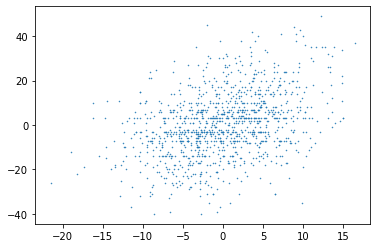

In [290]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
plt.scatter(y_pred, y_test,s=.25)

0.4227406587672924
0.09370022860013583


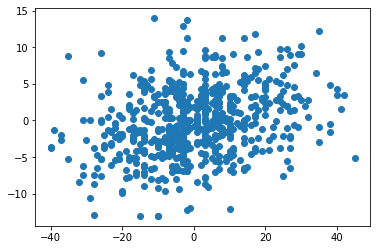

In [280]:
reg = GradientBoostingRegressor().fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)

-9.175438759325798e+21
-9.214000763511507e+21


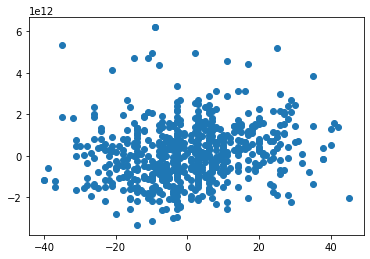

In [281]:
reg = SGDRegressor().fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)